<a href="https://colab.research.google.com/github/Tanthetaa45/Nucleus_detection/blob/main/%F0%9F%93%9CComplete_Credit_Risk_Modeling_%F0%9F%94%8D_%7C_1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
husainsb_lendingclub_issued_loans_path = kagglehub.dataset_download('husainsb/lendingclub-issued-loans')
wordsforthewise_lending_club_path = kagglehub.dataset_download('wordsforthewise/lending-club')
ethon0426_lending_club_20072020q1_path = kagglehub.dataset_download('ethon0426/lending-club-20072020q1')
adarshsng_lending_club_loan_data_csv_path = kagglehub.dataset_download('adarshsng/lending-club-loan-data-csv')
beatafaron_loan_credit_risk_and_population_stability_path = kagglehub.dataset_download('beatafaron/loan-credit-risk-and-population-stability')

print('Data source import complete.')


Data source import complete.


> In this kernel I will gradually create a full credit risk estimation model compliant with Basel II Standards.
> If you are interested in this topic please Vote for this notebook 😊👍

# 📘 SCOPE

> You have just been hired as a data scientist working in a team of credit risk management in LendingClub Company - a US peer-to-peer lending company, headquartered in San Francisco, California. It is the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. `LendingClub` is the world's largest peer-to-peer lending platform.
> You got a data that contains the information about past loan applicants and whether they ‘defaulted’ or not. Here what You should do:

## 🎯Business Tasks
1. Build and implement the best possible credit risk model - calculating Propability of Default (PD)
2. Use Weight of Evidence and Information Value for categorical variables
3. Build the behavioral score card based on selected features
4. Monitor Population stability - script for monitoring the model in the future


### ℹ️Short info:
> (PD) Propability of Default  - Credit Risk -  the probability that someone who borrowed money, does not repay their debt.
 Measuring credit risk well is the most effective way of ensuring that credit losses would be minimized.
The lender can also require collaterals. Thus, if a borrower does not repay, the asset that serves as a collateral can be acquired by the lender and sold to a third party in order to cover some of the losses in case the borrower defaults. Third, the lender can make sure that the greater loss they expect, the higher the price of lending that they charge.
> (PSI) Population Stability Index - compares the distribution of predicted probability in scoring data with predicted probability in training data.

## 🔍Understanding the business process
> When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

> - If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
> - If the applicant is not likely to repay the loan (likely to default), then approving the loan may lead to a financial loss for the company

## 📜 Basel II Standards
>Basel II is an international business standard that requires financial institutions to maintain enough cash reserves to cover risks incurred by their operations. The Basel accords are a series of recommendations on banking laws and regulations issued by the Basel Committee on Banking Supervision.
The three pillars of the Basel II Accord are minimal capital requirements (SA - Standardized Approach, F-IRB - foundation Intrnal Ratings Based Approach, A-IRB- Internal Rating Based Approach) supervisory review, market discipline.
Under the standardized approach, the amount that should be held as capital for every retail exposure, as a percentage of the total exposure is 75%.


# ⚙️EDA + Feature Engineering

In [7]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

## 1. Reading file

In [8]:
beatafaron_loan_credit_risk_and_population_stability_path = kagglehub.dataset_download('beatafaron/loan-credit-risk-and-population-stability')

df = pd.read_csv(beatafaron_loan_credit_risk_and_population_stability_path + '/loan_2014_18.csv')
dictionary = pd.read_excel(beatafaron_loan_credit_risk_and_population_stability_path + '/LoanDataDictionary.xlsx')

df.head(20)

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,0,120122535,12000.0,12000.0,12000.0,36 months,7.97%,375.88,A,A5,associate,10+ years,OWN,42000.0,Source Verified,2017-09-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,923xx,CA,27.74,0.0,Jun-1996,715.0,719.0,0.0,NaN,80.0,9.0,1.0,11457.0,37%,16.0,w,0.00,0.00,13500.440000,13500.44,12000.00,1500.44,0.00,0.00,0.0000,May-2020,2591.95,NaN,May-2020,694.0,690.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,30502.0,1.0,2.0,1.0,3.0,8.0,19045.0,73.0,2.0,4.0,7117.0,53.0,31000.0,1.0,1.0,2.0,7.0,3389.0,7144.0,53.9,0.0,0.0,131.0,255.0,1.0,1.0,0.0,14.0,NaN,8.0,NaN,0.0,2.0,6.0,2.0,2.0,7.0,7.0,9.0,6.0,9.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,57180.0,30502.0,15500.0,26180.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,1,119374887,32000.0,32000.0,32000.0,36 months,11.99%,1062.71,B,B5,Nurse,10+ years,MORTGAGE,155000.0,Source Verified,2017-09-01,Current,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,080xx,NJ,12.35,2.0,Sep-2005,715.0,719.0,1.0,10.0,NaN,20.0,0.0,48309.0,34.1%,42.0,w,6158.89,6158.89,31838.670000,31838.67,25841.11,5997.56,0.00,0.00,0.0000,May-2020,0.00,Jul-2020,May-2020,674.0,670.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,405751.0,2.0,1.0,1.0,1.0,8.0,15582.0,78.0,4.0,7.0,14049.0,40.0,142600.0,0.0,2.0,2.0,8.0,22542.0,81313.0,34.5,0.0,0.0,91.0,144.0,1.0,1.0,3.0,1.0,24.0,1.0,10.0,0.0,7.0,10.0,12.0,27.0,3.0,18.0,36.0,10.0,20.0,0.0,0.0,0.0,5.0,94.9,0.0,0.0,0.0,527034.0,63891.0,124200.0,20034.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,CVD19SKIP,INCOMECURT,ACTIVE,2.0,0.00,Apr-2020,Jun-2020,Apr-2020,2.0,0.0,ACTIVE,123.08000,6189.66,1062.71,N
2,2,119321612,40000.0,40000.0,400

In [9]:
df = df.drop(df.columns[0], axis=1)
df.shape

(2029952, 141)

## 2. Identifying the target (y)
> dependent variable :
In our dataset the dependent variable js the "loan_status" column.
First we check what types of categories it can take, then map it values as follows: </br>
>'Fully Paid', 'Current', 'In Grace Period'  - are map as '1' - **positive** </br>
>'Late (16-30 days)', 'Late (31-120 days)', 'Charged Off', 'Default' - are map with '0' - **negative**


In [10]:
# Define the mapping
loan_status_mapping = {
    'Fully Paid': 1,
    'Current': 1,
    'In Grace Period': 1,
    'Late (16-30 days)': 0,
    'Late (31-120 days)': 0,
    'Charged Off': 0,
    'Default': 0
}

# Apply the mapping to the 'Loan_Status' column
df['loan_status_binary'] = df['loan_status'].map(loan_status_mapping)
df.drop('loan_status', axis=1, inplace=True)

df['loan_status_binary'].value_counts()

,count
loan_status_binary,
1,1704881
0,325071


## 3. Missing values
> Check the missing values. columns that are missing by more than 50 percent will be removed.

In [11]:
def missing_data_summary(df, threshold=0):
    """
    Summarizes missing data, showing count and percentage of missing values for each column.
    Filters columns based on a missing percentage threshold.

    Parameters:
        df (pd.DataFrame): The dataframe to analyze.
        threshold (float): The minimum percentage of missing data to include in the summary.

    Returns:
        pd.DataFrame: A summary of missing data.
    """
    return (pd.DataFrame(df.isna().sum())
            .reset_index()
            .rename(columns={'index': 'Column', 0: 'mis_count'})
            .query('mis_count > 0')  # Only include columns with missing values
            .assign(Missing_Percentage=lambda x: x['mis_count'] / df.shape[0] * 100)
            .query(f'Missing_Percentage > {threshold}')  # Filter by threshold
            .sort_values('mis_count', ascending=False)
            .reset_index(drop=True))

missing = missing_data_summary(df,51)
missing

,Column,mis_count,Missing_Percentage
0,hardship_loan_status,1956776,96.395186
1,hardship_reason,1956678,96.390358
2,hardship_status,1956677,96.390309
3,hardship_dpd,1956675,96.390210
4,hardship_end_date,1956674,96.390161
5,hardship_length,1956674,96.390161
6,hardship_type,1956674,96.390161
7,deferral_term,1956674,96.390161
8,payment_plan_start_date,1956674,96.390161
9,hardship_start_date,1956674,96.390161


In [12]:
# Convert the first column of 'missing' to a list
columns_to_drop = missing.iloc[:, 0].tolist()

# Drop these columns from the DataFrame 'df'
df = df.drop(columns=columns_to_drop, errors='ignore')  # 'errors="ignore"' ensures no error if a column is missing

## 4. Categorical Features

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029952 entries, 0 to 2029951
Columns: 107 entries, id to loan_status_binary
dtypes: float64(82), int64(2), object(23)
memory usage: 1.6+ GB


### Objects
> First let's check the 'object' columns. We see that there are some columns that can be transformed to date or numeric columns.

In [14]:
df.select_dtypes(include=['object']).head()

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,pymnt_plan,url,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type,hardship_flag,debt_settlement_flag
0,36 months,7.97%,A,A5,associate,10+ years,OWN,Source Verified,2017-09-01,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,923xx,CA,Jun-1996,37%,w,May-2020,May-2020,Individual,N,N
1,36 months,11.99%,B,B5,Nurse,10+ years,MORTGAGE,Source Verified,2017-09-01,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,080xx,NJ,Sep-2005,34.1%,w,May-2020,May-2020,Individual,Y,N
2,60 months,15.05%,C,C4,Driver,9 years,MORTGAGE,Verified,2017-09-01,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,778xx,TX,Apr-2002,20.7%,w,May-2020,May-2020,Individual,N,N
3,36 months,7.97%,A,A5,Senior Investigator,5 years,RENT,Not Verified,2017-09-01,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,223xx,VA,Jun-2000,57.7%,w,May-2020,May-2020,Individual,N,N
4,36 months,7.21%,A,A3,Registered Nurse,< 1 year,MORTGAGE,Verified,2017-09-01,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,750xx,TX,Dec-2005,16.1%,w,Apr-2020,May-2020,Joint App,Y,N


In [15]:
# Remove leading/trailing whitespaces from objects
df = df.apply(lambda col: col.str.strip() if col.dtypes == 'object' else col)

# convert dates to 'datetime' types
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%Y-%m-%d')
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%Y')
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%Y')
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format='%b-%Y')

# int_rate and revol_util for int type
df['int_rate%']= pd.to_numeric(df['int_rate'].str.strip('%'))
df['revol_util%'] =pd.to_numeric(df['revol_util'].str.strip('%'))

columns_to_drop = {'title','zip_code','pymnt_plan', 'emp_title','int_rate','revol_util', 'url'}
df.drop(columns_to_drop, axis = 1, inplace = True)

df.debt_settlement_flag = np.where(df.debt_settlement_flag == 'Y',1,0)

df.term_36_months = np.where(df.term == '36 months',1,0)
df.drop('term', axis=1, inplace=True)

df['emp_length'] = df['emp_length'].fillna('')
df['emp_length'] = pd.to_numeric(df['emp_length'].str.replace('<', '', regex=False).str[:2].str.strip(), errors='coerce')

df.hardship_flag.fillna('N', inplace=True) #it looks like the Nans are as strings so
df.hardship_flag = np.where( df.hardship_flag == 'NaN','N', df.hardship_flag )


In [16]:
def get_sorted_unique_counts(df):
    # Select columns with categorical data
    object_cols = df.select_dtypes(include=['object', 'category']).columns

    # Get the number of unique entries in each categorical column
    object_nunique = {col: df[col].nunique() for col in object_cols}

    # Convert to DataFrame and sort by unique counts
    unique_counts = pd.DataFrame(list(object_nunique.items()), columns=['Column', 'Unique Count'])
    unique_counts = unique_counts.sort_values(by='Unique Count').reset_index(drop=True)

    return unique_counts

get_sorted_unique_counts(df)

,Column,Unique Count
0,initial_list_status,2
1,application_type,2
2,hardship_flag,2
3,verification_status,3
4,home_ownership,5
5,grade,7
6,purpose,14
7,sub_grade,35
8,addr_state,51


> Check how many unique values are in object columns. We check if binning is needed.
Check all for any inconsistences or imbalances

In [18]:
def value_counter(df):
    value_series = pd.DataFrame()
    for col in df.select_dtypes(["object"]).columns:
        print(df[col].value_counts(dropna = False))

value_counter(df)

grade
C    591304
B    588545
A    394264
D    290516
E    120001
F     34791
G     10531
Name: count, dtype: int64
home_ownership
MORTGAGE    995479
RENT        799121
OWN         234352
ANY            996
NONE             4
Name: count, dtype: int64
verification_status
Source Verified    833961
Not Verified       667220
Verified           528771
Name: count, dtype: int64
purpose
debt_consolidation    1146650
credit_card            468324
home_improvement       136961
other                  126119
major_purchase          44475
medical                 25216
car                     20447
small_business          19952
vacation                14216
moving                  13736
house                   12617
renewable_energy         1217
wedding                    20
educational                 2
Name: count, dtype: int64
addr_state
CA    276361
TX    168862
NY    166067
FL    146039
IL     82188
NJ     73932
PA     68942
OH     67905
GA     66819
NC     56486
VA     55695
MI     53425
MD 

### 💡🔧Key observations

> sub_grade : is already grupped by grade
>
> home_wnership : The majority categories (mortgage and rent) dominate the data, while own and especially other are underrepresented.
Such an imbalance can lead to biased models, where predictions are skewed toward the majority classes.
>
> purpose : here is huge imbalance, especialy on medical, car, small_business, vacation, moving, house, renewable_energy, wedding, educational. It should be grouped
>
> addr_state : as well

In [17]:
df.drop('sub_grade', axis=1, inplace = True)

# 🔍Using WoE & IV for categorical features
>Now we will group categorical data based on Weight of Evidence (WoE) and create a table with relevant measures.
> **WoE**: WoE is computed as:<br>
> "Non-Event" - bad = '0' defaulted loans, <br>
> "Event"     - good = '1' non-default loans.<br>

$$
\text{WoE} = \ln\left(\frac{\text{Proportion of Non-Event}}{\text{Proportion of Event}}\right)
$$


> **IV (Information Value)** indicates the predictive power of the categorical variable. Total IV: Interpret the IV to understand the variable's predictive strength.

$$
\text{IV} = \sum \left( (\text{Proportion of Non-Event} - \text{Proportion of Event}) \cdot \text{WoE} \right)
$$

>Interpretation of IV:<br>
> < 0.02: Not Predictive <br>
> 0.02 - 0.1: Weak Predictive Power<br>
> 0.1 - 0.3: Medium Predictive Power<br>
> 0.3+: Strong Predictive Power<br>
> IV > 0.5: Suspiciously strong — Could indicate overfitting or data issues.

In [19]:
def process_categorical_columns(df, categorical_cols, target_col, woe_table=None, iv_summary=None, append=False):
    """
    Calculate WoE and IV for given categorical columns, including NaNs as a separate category.

    Args:
        df (pd.DataFrame): Input DataFrame.
        categorical_cols (list): List of categorical column names to process.
        target_col (str): Name of the binary target column (1 = Good, 0 = Bad).
        woe_table (pd.DataFrame): Existing WoE table (required if append=True).
        iv_summary (pd.DataFrame): Existing IV summary (required if append=True).
        append (bool): If True, append results to existing tables.

    Returns:
        woe_table (pd.DataFrame): WoE table with all processed columns.
        iv_summary (pd.DataFrame): IV summary table with all processed columns.
    """
    if append and (woe_table is None or iv_summary is None):
        raise ValueError("Existing tables must be provided when append=True.")

    # Initialize results if not appending
    if not append:
        woe_table = pd.DataFrame()
        iv_summary = pd.DataFrame()

    new_woe_results = []
    new_summary = []

    # Process each categorical column
    for col in categorical_cols:
        # Handle NaN values by creating a separate 'NaN' category
        df[col] = df[col].fillna('NaN')

        # Group by the column to calculate metrics
        stats = df.groupby(col).agg(
            event_count=(target_col, 'sum'),
            total_count=(target_col, 'count')
        ).reset_index()

        # Calculate non-event count and proportions
        stats['non_event_count'] = stats['total_count'] - stats['event_count']
        total_events = stats['event_count'].sum()
        total_non_events = stats['non_event_count'].sum()

        # Avoid division by zero
        stats['event_rate'] = stats['event_count'] / (total_events + 1e-6)
        stats['non_event_rate'] = stats['non_event_count'] / (total_non_events + 1e-6)

        # Calculate WoE
        stats['woe'] = np.log((stats['non_event_rate'] + 1e-6) / (stats['event_rate'] + 1e-6))

        # Calculate IV for each category
        stats['iv'] = (stats['non_event_rate'] - stats['event_rate']) * stats['woe']

        # Compute total IV for the column
        total_iv = stats['iv'].sum()

        # Add column name and rename for desired format
        stats['name'] = col  # Add column name
        stats.rename(columns={col: 'sub_name'}, inplace=True)  # Rename column to 'sub_name'

        # Reorder columns
        stats = stats[['name', 'sub_name', 'event_count', 'total_count', 'non_event_count',
                       'event_rate', 'non_event_rate', 'woe', 'iv']]

        # Append results
        new_woe_results.append(stats)
        new_summary.append({'Column': col, 'IV': total_iv})

    # Combine results with existing tables if appending
    new_woe_table = pd.concat(new_woe_results, ignore_index=True)
    new_iv_summary = pd.DataFrame(new_summary).sort_values(by='IV', ascending=False)

    if append:
        woe_table = pd.concat([woe_table, new_woe_table], ignore_index=True)
        iv_summary = pd.concat([iv_summary, new_iv_summary], ignore_index=True).sort_values(by='IV', ascending=False)
    else:
        woe_table = new_woe_table
        iv_summary = new_iv_summary

    return woe_table, iv_summary

In [20]:
# Initial processing
categorical_cols = df.select_dtypes(include=['object']).columns
woe_table, iv_summary = process_categorical_columns(df, categorical_cols, 'loan_status_binary')

# Save initial results
# woe_table.to_csv('woe_table.csv', index=False)
# iv_summary.to_csv('iv_summary.csv', index=False)

iv_summary

,Column,IV
0,grade,0.446070
7,hardship_flag,0.106937
2,verification_status,0.065469
1,home_ownership,0.028805
3,purpose,0.018485
4,addr_state,0.014741
5,initial_list_status,0.009938
6,application_type,0.001999


In [21]:
 #dropping where IV < 0.02
drop= {'application_type','initial_list_status','addr_state','purpose'}
df.drop(drop, axis=1, inplace=True)

In [22]:
print("Initial WoE Table:")
woe_table[woe_table.name == 'hardship_flag']

Initial WoE Table:


,name,sub_name,event_count,total_count,non_event_count,event_rate,non_event_rate,woe,iv
84,hardship_flag,N,1649632,1974346,324714,0.967594,0.998902,0.031844,0.000997
85,hardship_flag,Y,55249,55606,357,0.032406,0.001098,-3.383783,0.105940


In [23]:
print("Initial WoE Table:")
woe_table[woe_table.name == 'verification_status']

Initial WoE Table:


,name,sub_name,event_count,total_count,non_event_count,event_rate,non_event_rate,woe,iv
12,verification_status,Not Verified,589329,667220,77891,0.345672,0.239612,-0.366466,0.038867
13,verification_status,Source Verified,694890,833961,139071,0.407589,0.427817,0.048438,0.000980
14,verification_status,Verified,420662,528771,108109,0.246740,0.332570,0.298516,0.025622


In [24]:
print("Initial WoE Table:")
woe_table[woe_table.name == 'home_ownership']

Initial WoE Table:


,name,sub_name,event_count,total_count,non_event_count,event_rate,non_event_rate,woe,iv
7,home_ownership,ANY,872,996,124,0.000511,0.000381,-0.292636,0.000038
8,home_ownership,MORTGAGE,858024,995479,137455,0.503275,0.422846,-0.174128,0.014005
9,home_ownership,NONE,4,4,0,0.000002,0.000000,-1.207827,0.000003
10,home_ownership,OWN,196277,234352,38075,0.115127,0.117128,0.017238,0.000035
11,home_ownership,RENT,649704,799121,149417,0.381085,0.459644,0.187431,0.014724


> As we see the WoE, IV and total counts numbers we can group the 'ANY', 'MORTGAGE' and 'NONE' together.

In [25]:
home_ownership_mapping = {
    'ANY' : 'other',
    'MORTGAGE' : 'other',
    'RENT' : 'rent',
    'OWN' : 'own',
    'NONE' : 'other'
}
df.home_ownership = df.home_ownership.map(home_ownership_mapping)

### 📊 Checking categorical features vs target

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
from matplotlib.ticker import FuncFormatter

# Set global aesthetics for plots
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.size'] = 14
#plt.rcParams['font.family'] = 'Roboto Condensed'  # Set font

# Ensure font is available
font_path = fm.findfont(fm.FontProperties(family='Roboto Condensed'))

# Define a custom color palette
palette = {1: '#949398FF', 0: '#FC766AFF', 'NaN': '#D3D3D3'}  # Add a color for NaN values

# Function to format large numbers as plain text
def plain_formatter(x, _):
    return f'{int(x):,}'  # Format with commas for thousands


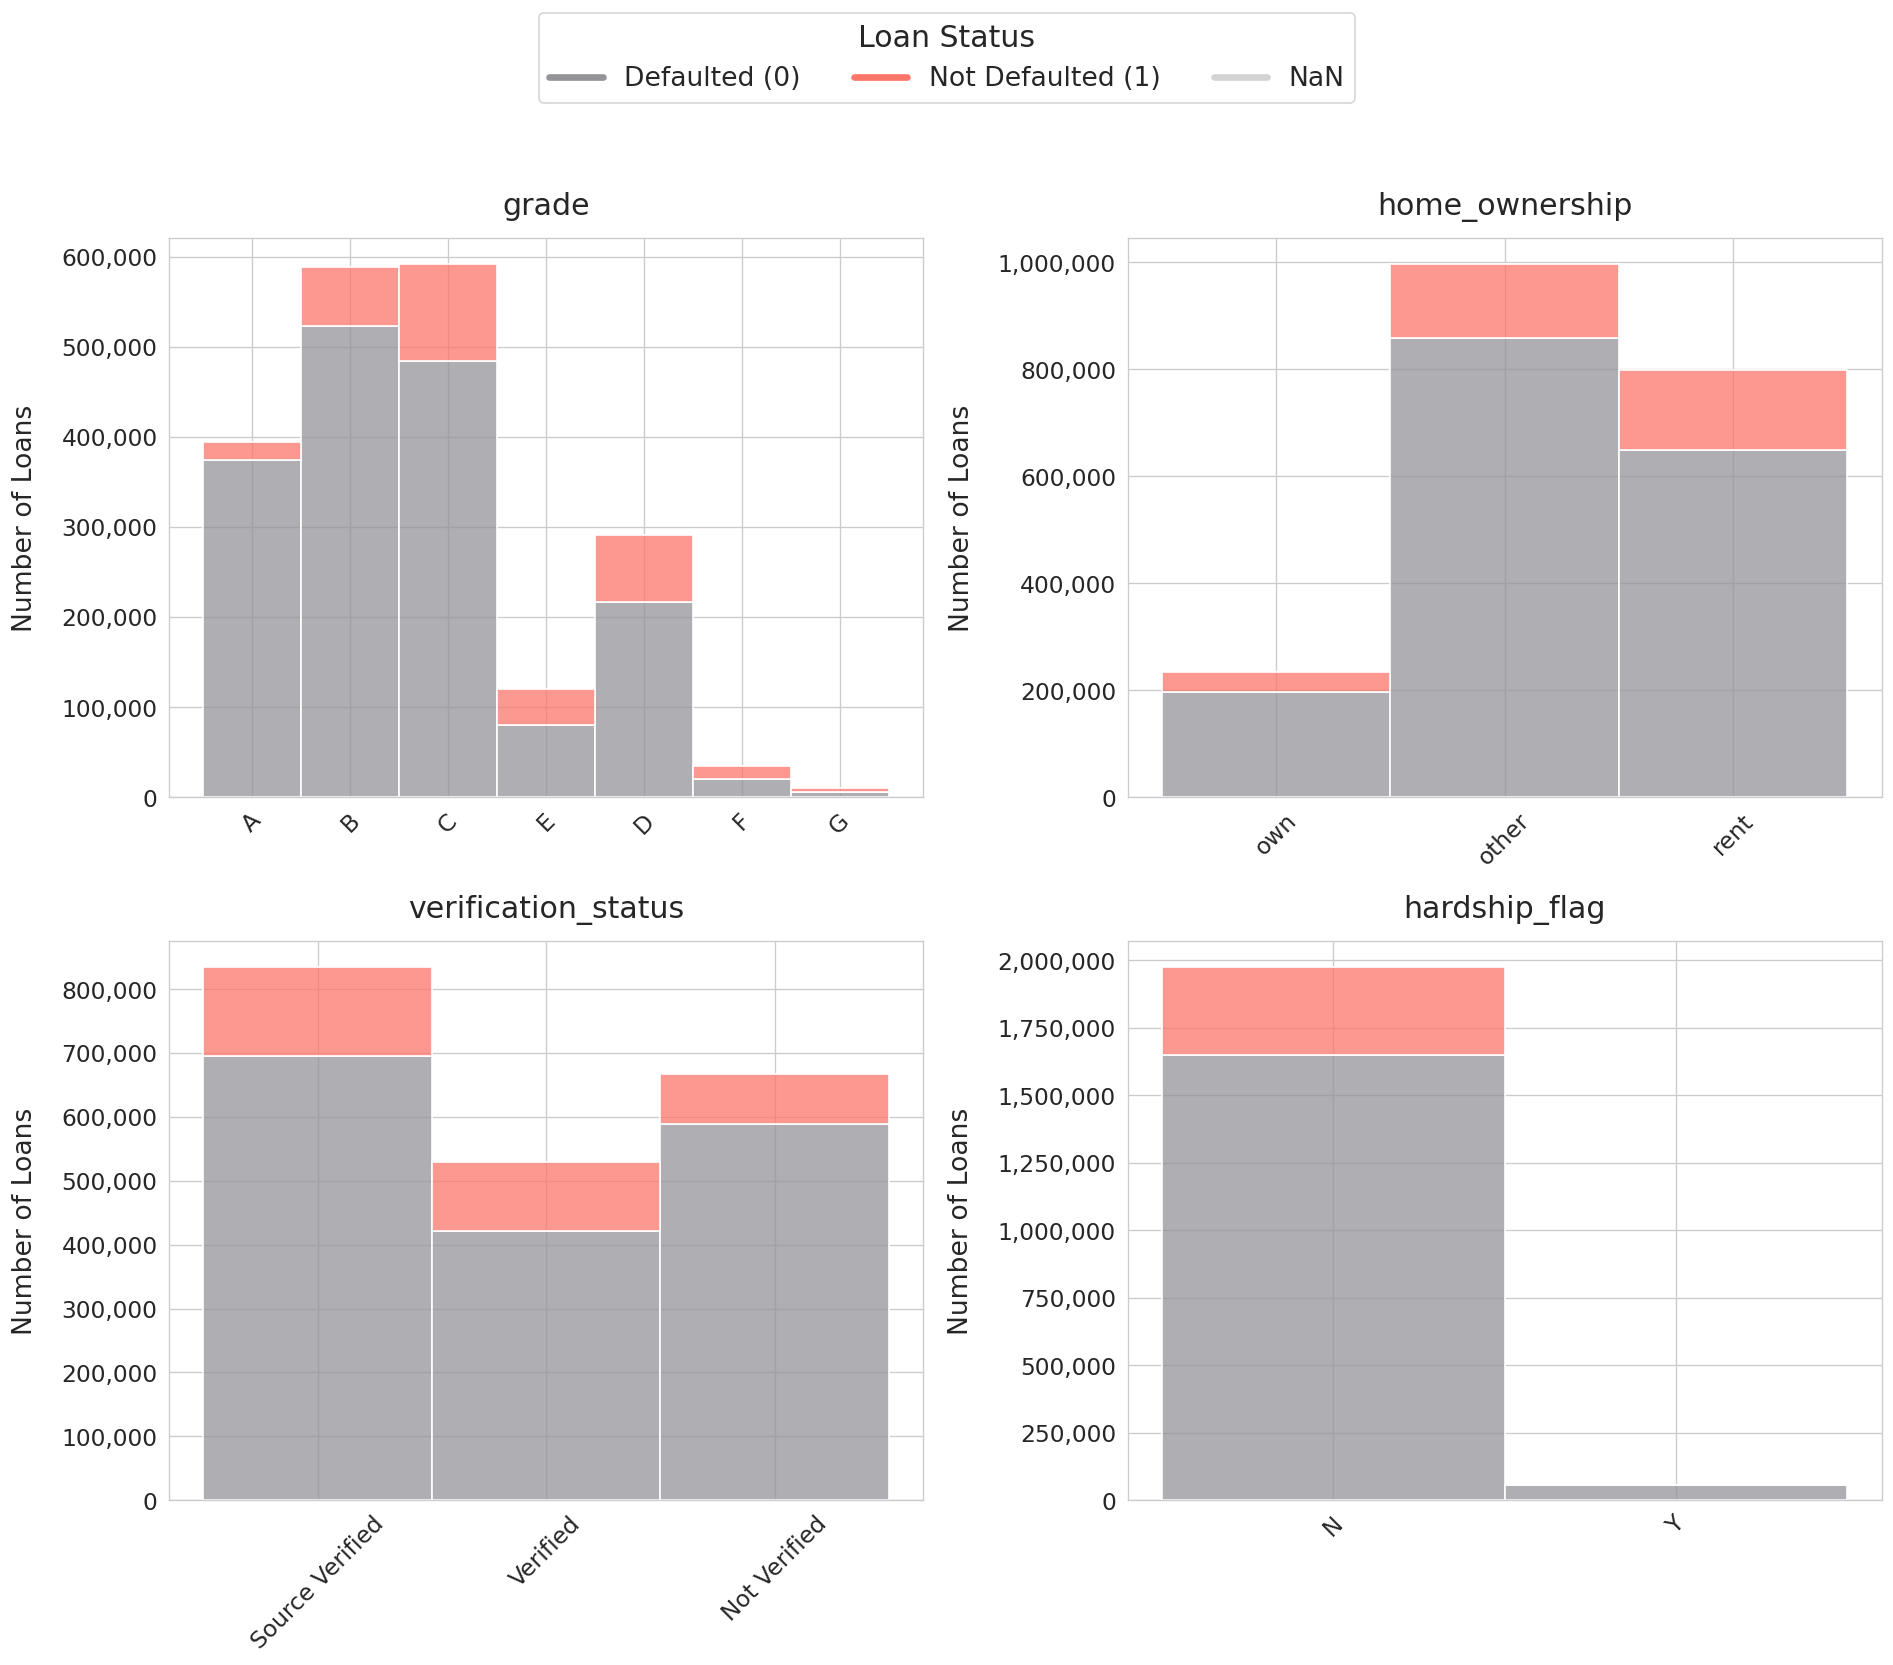

In [27]:
# Select object columns (replace this with your actual DataFrame and column selection)
object_columns = df.select_dtypes(include=['object']).columns

# Create subplots
n_columns = 2  # Number of plots per row
n_rows = (len(object_columns) + 1) // n_columns  # Calculate number of rows
fig, axes = plt.subplots(n_rows, n_columns, figsize=(16, n_rows * 7))  # Dynamic height

# Flatten axes for easier iteration
axes = axes.flatten()

# Plot each histogram
for i, column in enumerate(object_columns):
    df[column] = df[column].fillna('NaN')  # Replace NaN with a string 'NaN' for visualization
    sns.histplot(
        data=df,
        x=column,
        hue='loan_status_binary',
        multiple='stack',
        kde=False,
        palette=palette,
        hue_order=[0, 1, 'NaN'],  # Ensure NaN appears in the legend and the plot
        ax=axes[i],
        legend=False  # Suppress legends for individual plots
    )
    # Set column name as title
    axes[i].set_title(column, fontsize=18, pad=14)  # Title above each histogram
    # Remove x-axis label
    axes[i].set_xlabel('')
    # Adjust y-axis label
    axes[i].set_ylabel('Number of Loans', fontsize=16, labelpad=14)
    # Format ticks
    axes[i].tick_params(axis='x', rotation=45, labelsize=14)
    axes[i].tick_params(axis='y', labelsize=14)
    # Format y-axis without scientific notation
    axes[i].yaxis.set_major_formatter(FuncFormatter(plain_formatter))

# Remove unused subplots
for j in range(len(object_columns), len(axes)):
    fig.delaxes(axes[j])

# Add a single legend for the custom colors
handles = [plt.Line2D([0], [0], color=color, lw=4, label=label)
           for label, color in zip(['Defaulted (0)', 'Not Defaulted (1)', 'NaN'], palette.values())]
fig.legend(handles=handles, loc='upper center', fontsize=16, title='Loan Status', title_fontsize=18, ncol=3)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1,0.9])  # Leave space for the legend
plt.show()


## 5. Date features

>Date columns often contain valuable temporal information that can improve predictive modeling. Lets extract meaningful features from these date columns.



In [28]:
date_cols = df.select_dtypes(include=['datetime64']).columns
df[date_cols].head()

,issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d
0,2017-09-01,1996-06-01,2020-05-01,2020-05-01
1,2017-09-01,2005-09-01,2020-05-01,2020-05-01
2,2017-09-01,2002-04-01,2020-05-01,2020-05-01
3,2017-09-01,2000-06-01,2020-05-01,2020-05-01
4,2017-09-01,2005-12-01,2020-04-01,2020-05-01


In [29]:
df[date_cols].isna().sum()

,0
issue_d,0
earliest_cr_line,0
last_pymnt_d,2190
last_credit_pull_d,58


In [30]:
from datetime import datetime

# Assuming 'today' as the current date
today = pd.to_datetime("today")

#impute a today date to distinguish missing values.
df['last_pymnt_d'].fillna(today, inplace=True)
df['last_credit_pull_d'].fillna(today, inplace=True)

# Time differences
df['loan_age'] = (today - df['issue_d']).dt.days
df['credit_history_length'] = (df['issue_d'] - df['earliest_cr_line']).dt.days
df['time_since_last_payment'] = (today - df['last_pymnt_d']).dt.days
df['time_since_last_credit_pull'] = (today - df['last_credit_pull_d']).dt.days

# Temporal components
df['issue_year'] = df['issue_d'].dt.year
df['issue_month'] = df['issue_d'].dt.month

# Categorical flags
df['recent_payment'] = (df['time_since_last_payment'] <= 30).astype(int)
df['recent_credit_pull'] = (df['time_since_last_credit_pull'] <= 90).astype(int)

drop = {'issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d'}
df.drop(drop,axis=1, inplace=True)

## 6. Numeric Features

In [1]:
y = df.loan_status_binary
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(exclude=['object']).drop('loan_status_binary',axis=1).columns

# Concatenate numeric columns explicitly
df_final = pd.concat([df[num_cols], pd.get_dummies(df[cat_cols], drop_first=True)], axis=1)

NameError: name 'df' is not defined

In [ ]:
external_scores = {'last_fico_range_high','last_fico_range_low','fico_range_low', 'fico_range_high'}
df_final.drop(external_scores , axis=1, inplace=True)
df_final.drop('id', axis=1, inplace=True)

In [ ]:
from sklearn.impute import SimpleImputer

# Define imputer (mean for numeric features, most frequent for categorical)
imputer = SimpleImputer(strategy='mean')

# Apply imputation to X
X_imputed = imputer.fit_transform(df_final)

# Convert back to DataFrame if necessary
df_final = pd.DataFrame(X_imputed, columns=df_final.columns)


1. Correlation Analysis
Identify features strongly correlated with the target variable.

In [ ]:
# Compute the absolute correlations
correlations = df_final.corrwith(y).abs()

# Convert to DataFrame and sort
correlation_df = correlations.sort_values(ascending=False).reset_index()
correlation_df.columns = ['name', 'correlation']

# Display the resulting DataFrame
correlation_df.head(30)

In [ ]:
# Compute correlation matrix for independent variables
feature_corr = df_final.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(feature_corr, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
# Identify pairs of highly correlated features
threshold = 0.8
high_corr_pairs = feature_corr.abs().stack().reset_index()
high_corr_pairs = high_corr_pairs[high_corr_pairs['level_0'] != high_corr_pairs['level_1']]
high_corr_pairs = high_corr_pairs[high_corr_pairs[0] > threshold]
high_corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']
high_corr_pairs

# 📊Feature selection & training

> Highly correlated features can lead to redundancy, multicollinearity, and reduced model interpretability.
> We already checked correlation with target:  Pearson correlation with the target variable to rank features,correlation matrix heatmap.
> There is a way to drop one feature from each highly correlated pair (e.g., |correlation| > 0.8) using domain knowledge.
> There is also an option to use Tree-Based Models for feature selection and rank features based on importance scores.

## 1. Selection based on correlation

In [ ]:
# Create a set to store features to drop
features_to_drop = set()

# Iterate through each pair of highly correlated features
for _, row in high_corr_pairs.iterrows():
    feature1 = row['Feature1']
    feature2 = row['Feature2']

    # Get the correlation with the target for both features
    corr1 = correlation_df[correlation_df['name'] == feature1]['correlation'].values[0]
    corr2 = correlation_df[correlation_df['name'] == feature2]['correlation'].values[0]

    # Drop the feature with lower correlation with the target
    if corr1 >= corr2:
        features_to_drop.add(feature2)
    else:
        features_to_drop.add(feature1)

# Drop features from your dataset
selected_features = [col for col in feature_corr.columns if col not in features_to_drop]

# Print the results
print(f"Features to drop: {features_to_drop}")
print(f"Remaining features: {len(selected_features)}")

> From highly correlated features  loan-amount and installment lets do a one new feature

In [ ]:
df_final['loan_amnt_div_instlmnt']=df_final['loan_amnt']/df_final['installment']

In [ ]:
drop={'funded_amnt_inv', 'total_bal_il', 'total_pymnt', 'num_rev_tl_bal_gt_0',
      'issue_year', 'num_sats', 'num_op_rev_tl', 'total_bc_limit',
      'total_il_high_credit_limit', 'credit_history_length', 'num_bc_tl',
      'out_prncp_inv', 'num_tl_30dpd', 'bc_util', 'tot_cur_bal',
      'num_actv_bc_tl', 'open_acc', 'funded_amnt', 'loan_amnt',
      'installment','collection_recovery_fee', 'total_pymnt_inv',
      'revol_bal', 'revol_util%', 'num_bc_sats'}
df_final.drop(drop,axis=1, inplace=True)

## 2. Further features selection with RFE

In [ ]:
X = df_final

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train Random Forest for feature selection
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Select features with importance above a threshold
model = SelectFromModel(rf, prefit=True, threshold="mean")
X_train_selected = model.transform(X_train_scaled)
X_test_selected = model.transform(X_test_scaled)

print(f"Original features: {X.shape[1]}, Selected features: {X_train_selected.shape[1]}")

# Get the mask of selected features
selected_features_mask = model.get_support()

# Get the names of the selected features
selected_features_names = np.array(X.columns)[selected_features_mask]
selected_features_names

RESULT: 'out_prncp', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'last_pymnt_amnt',
       'debt_settlement_flag', 'int_rate%', 'loan_age',
       'time_since_last_payment', 'time_since_last_credit_pull',
       'loan_amnt_div_instlmnt'

# 💠Training Models

In [ ]:
# Define a function to evaluate and display metrics
def evaluate_model(model, X_test, y_test, model_name):
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)

    conf_matrix = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta=2)
    auc = roc_auc_score(y_test, y_pred_prob)

    print(f"Results for {model_name}:")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F2 Score: {f2:.4f}")
    print(f"AUC: {auc:.4f}")
    print("\n")

    return {
        "Model": model_name,
        "Accuracy": accuracy,
        "Recall": recall,
        "F2": f2,
        "AUC": auc
    }



##  1. Logistic Regression
##  2. Random Forest
##  3. Gradient Boost
##  4. Neural Networks

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    confusion_matrix, accuracy_score, recall_score, fbeta_score, roc_auc_score,
    classification_report, RocCurveDisplay)

# Logistic Regression Model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_selected, y_train)

# Random Forest Model
rf_soft = RandomForestClassifier(n_estimators=100, random_state=42)
rf_soft.fit(X_train_selected, y_train)

# Gradient Boosting Model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train_selected, y_train)

# Neural Network Model
nn_model = MLPClassifier(hidden_layer_sizes=(50, 25), max_iter=300, random_state=42, solver='adam')
nn_model.fit(X_train_selected, y_train)

# Update the evaluation code to include all four models
results = []
results.append(evaluate_model(lr_model, X_test_selected, y_test, "Logistic Regression"))
results.append(evaluate_model(rf_soft, X_test_selected, y_test, "Random Forest"))
results.append(evaluate_model(gb_model, X_test_selected, y_test, "Gradient Boosting"))
results.append(evaluate_model(nn_model, X_test_selected, y_test, "Neural Network"))

# Plot ROC Curves for all models
plt.figure(figsize=(4, 4))
RocCurveDisplay.from_estimator(lr_model, X_test_selected, y_test, name="Logistic Regression")
RocCurveDisplay.from_estimator(rf_soft, X_test_selected, y_test, name="Random Forest")
RocCurveDisplay.from_estimator(gb_model, X_test_selected, y_test, name="Gradient Boosting")
RocCurveDisplay.from_estimator(nn_model, X_test_selected, y_test, name="Neural Network")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.show()

# Summarize the results in a DataFrame

results_df = pd.DataFrame(results)
print("Summary of Results:")
print(results_df)


# 📜Conclusion
> The Neural Network and Random Forest model has quite good scores! We could check a different thresholds to see if the FP and FN can have a better results.
> <br>
> In next notebook we will create a behavioral scorecard: the general framework involves setting score ranges and corresponding risk groups (e.g., high-risk, medium-risk, low-risk) based on statistical analysis and business policies.<br>
> To not interupt the code and make the steps clear I'm saving the important results:<br>
> * Neural Network  model<br>
> * Random Forest model<br>
> * data after cleaning with selected features.<br>
Everything here:<br>
https://www.kaggle.com/datasets/beatafaron/loan-credit-risk-and-population-stability


# 🎯Next Steps
> Here is direct link to next steps: <br>
> https://www.kaggle.com/code/beatafaron/3-complete-credit-risk-modeling-psi

In [ ]:
# save models for later

In [ ]:
import joblib
# Save the NN model to a file
joblib.dump(nn_model, 'nn_model_model.pkl')

# Save the RF model to a file
joblib.dump(rf_soft, 'rf_soft_model.pkl')

# Save df_final to a CSV file
df_final = df_final[selected_features_names]
df_final.to_csv("df_2014-18_selected.csv", index=False)